# 베타, 감마, 디리클레분포 (모수 $\mu$의 베이지안 추정에 쓰는 분포)

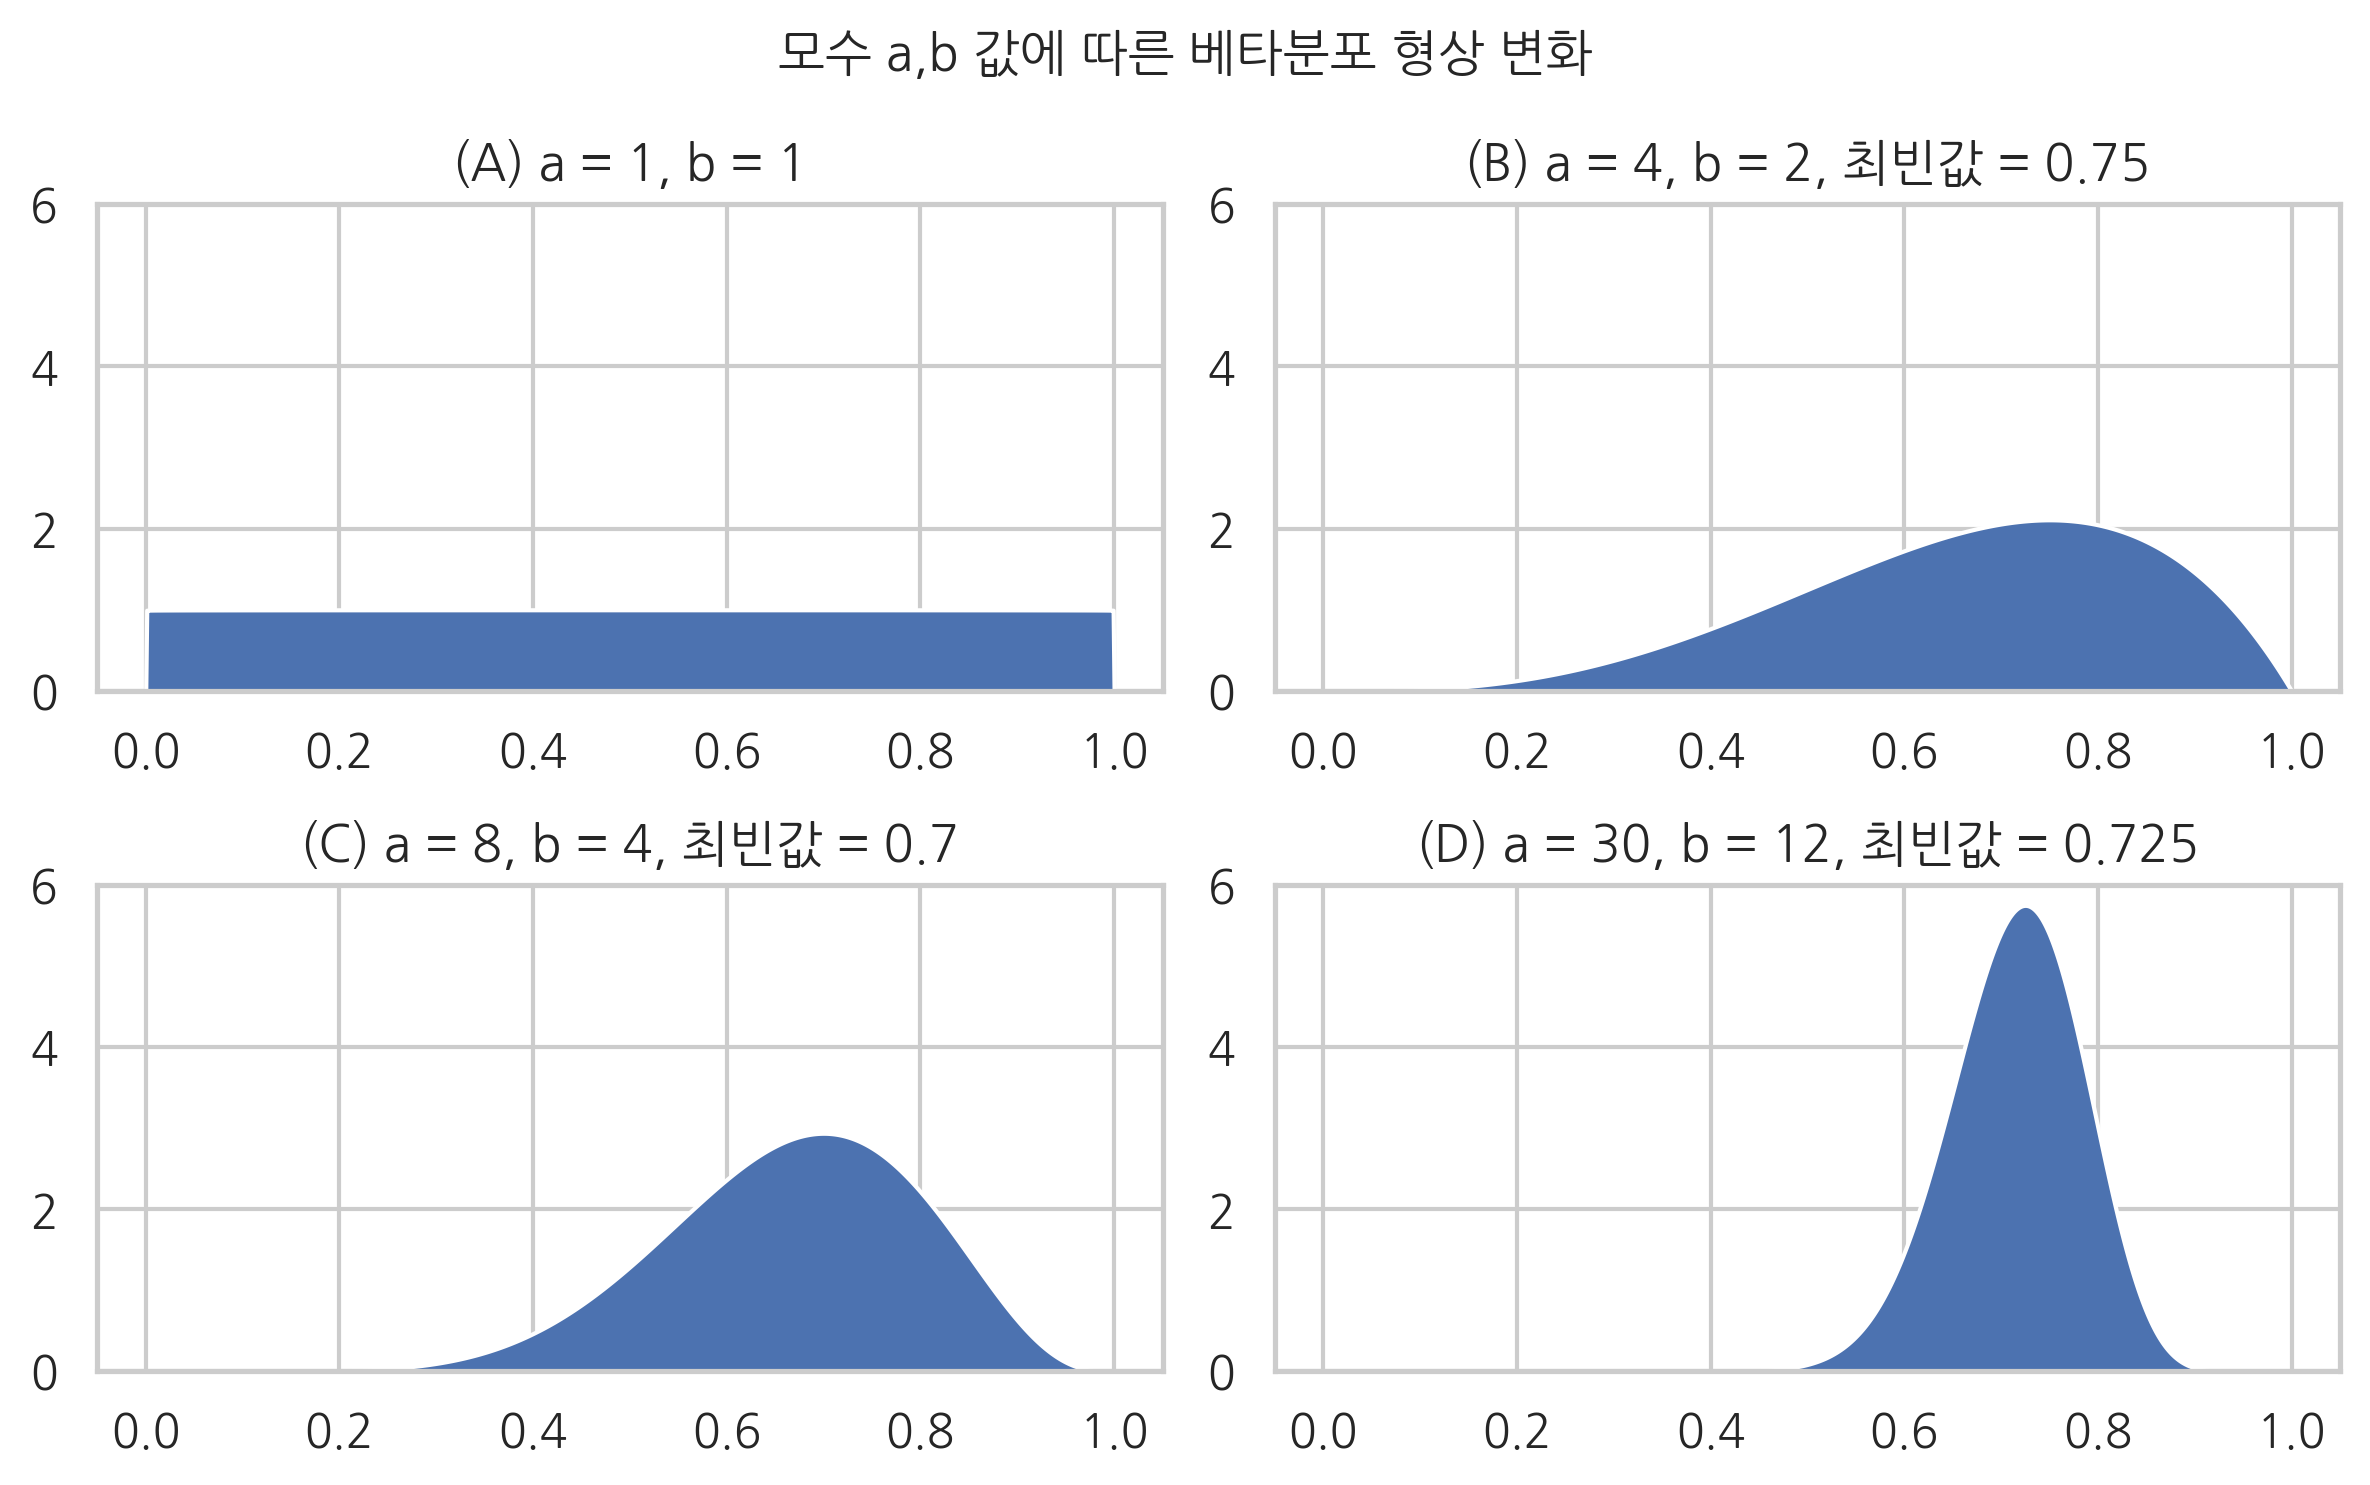

In [12]:
# 베타분포 확률밀도함수
xx = np.linspace(0,1,1000)
plt.subplot(221)
plt.fill_between(xx, sp.stats.beta(1.001, 1.001).pdf(xx))
plt.ylim(0, 6)
plt.title('(A) a = 1, b = 1')

plt.subplot(222)
plt.fill_between(xx, sp.stats.beta(4,2).pdf(xx))
plt.ylim(0, 6)
plt.title('(B) a = 4, b = 2, 최빈값 = {}'.format(3/(4)))

plt.subplot(223)
plt.fill_between(xx, sp.stats.beta(8, 4).pdf(xx))
plt.ylim(0, 6)
plt.title('(C) a = 8, b = 4, 최빈값 = {}'.format(7/(10)))

plt.subplot(224)
plt.fill_between(xx, sp.stats.beta(30,12).pdf(xx))
plt.ylim(0, 6)
plt.title('(D) a = 30, b = 12, 최빈값 = {}'.format(29/(40)))

plt.suptitle('모수 a,b 값에 따른 베타분포 형상 변화')
plt.tight_layout()
plt.show()

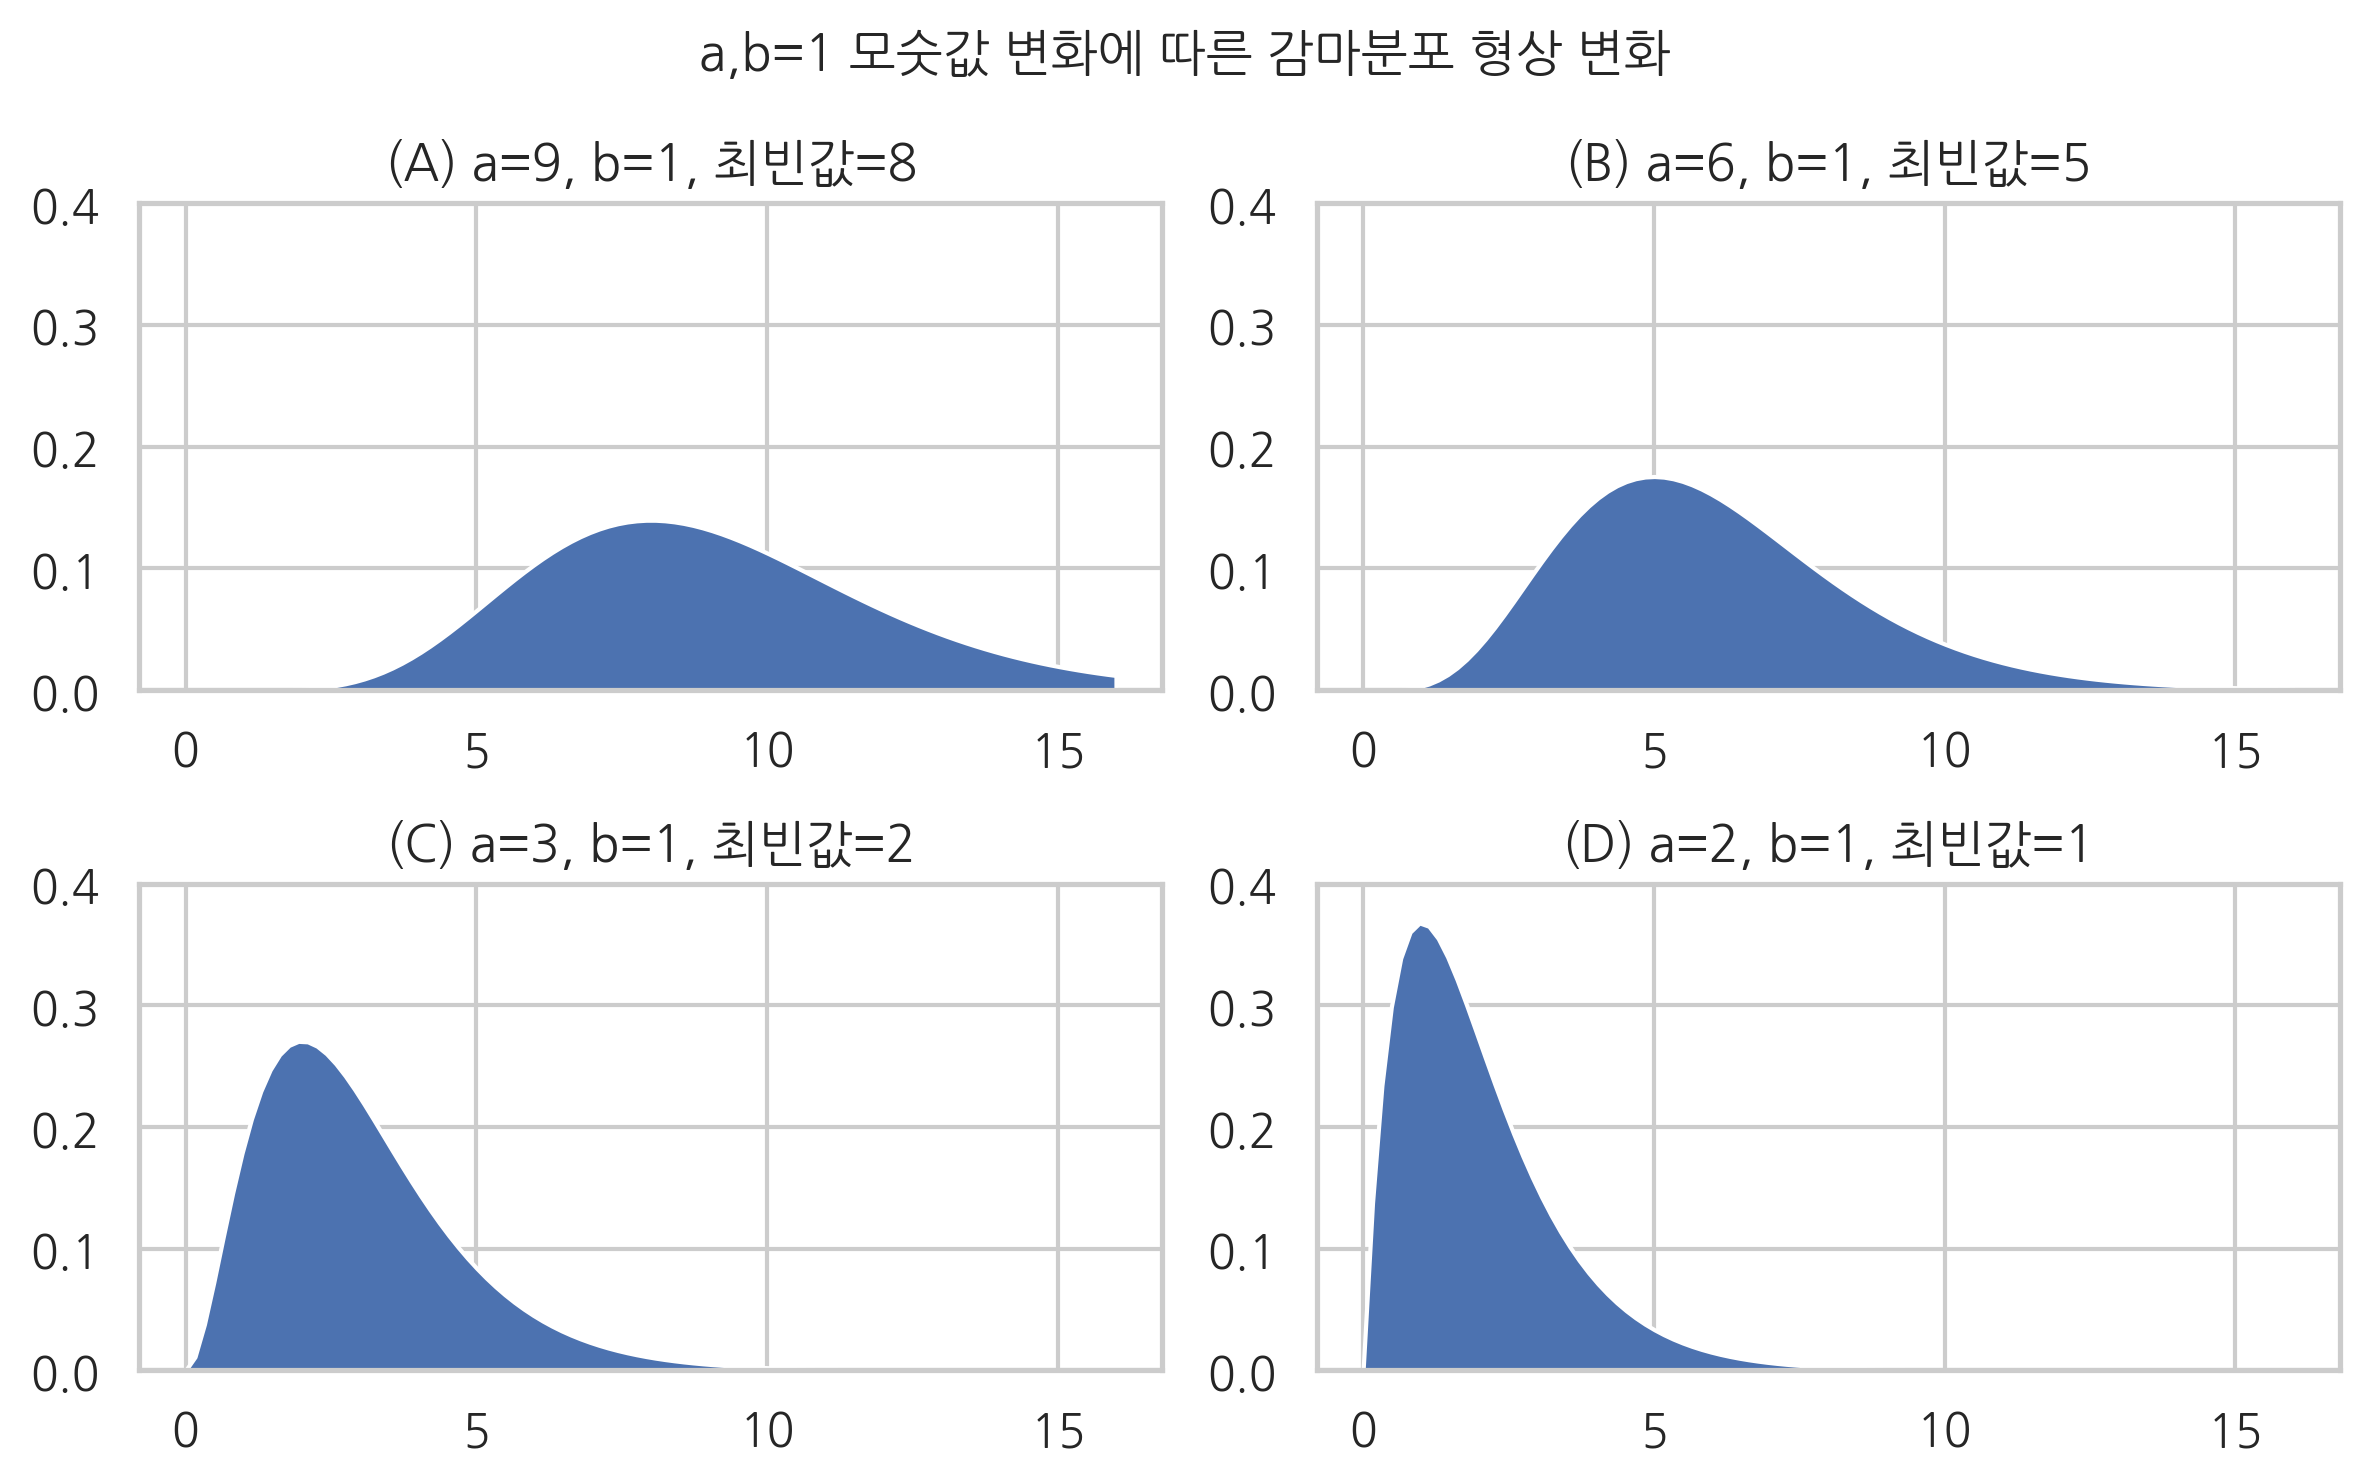

In [27]:
# 감마분포 확률밀도함수
xx = np.linspace(0,16,100)
plt.subplot(221)
plt.fill_between(xx, sp.stats.gamma(9).pdf(xx))
plt.ylim(0, 0.4)
plt.title('(A) a=9, b=1, 최빈값={}'.format(8))

plt.subplot(222)
plt.fill_between(xx, sp.stats.gamma(6).pdf(xx))
plt.ylim(0, 0.4)
plt.title('(B) a=6, b=1, 최빈값={}'.format(5))

plt.subplot(223)
plt.fill_between(xx, sp.stats.gamma(3).pdf(xx))
plt.ylim(0, 0.4)
plt.title('(C) a=3, b=1, 최빈값={}'.format(2))

plt.subplot(224)
plt.fill_between(xx, sp.stats.gamma(2).pdf(xx))
plt.ylim(0, 0.4)
plt.title('(D) a=2, b=1, 최빈값={}'.format(1))

plt.suptitle('a,b=1 모숫값 변화에 따른 감마분포 형상 변화')
plt.tight_layout()
plt.show()


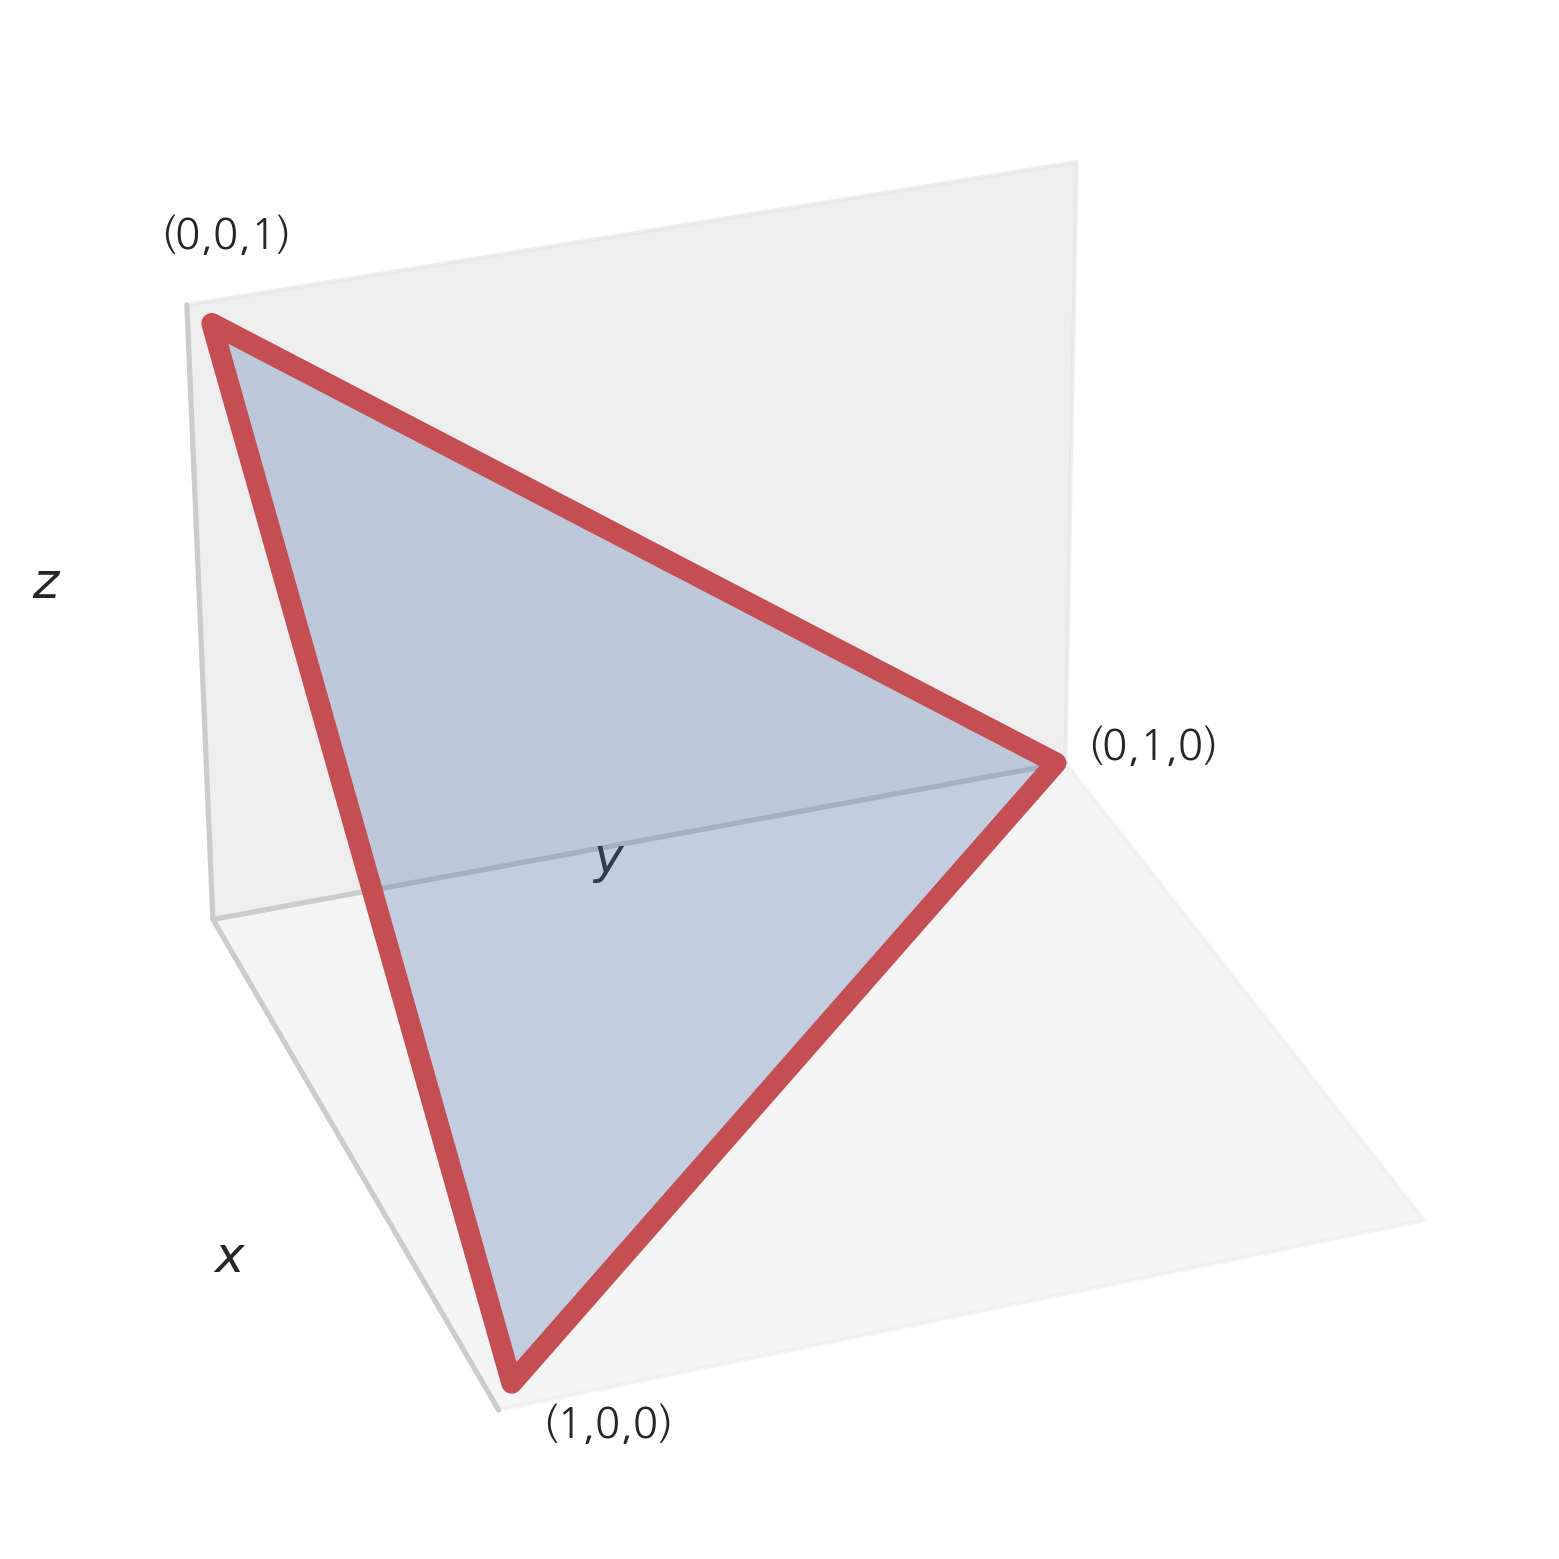

In [51]:
# 디리클레분포
# 디리클레 '균등'분포

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

fig = plt.figure()
ax = Axes3D(fig)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
x = [1,0,0]
y = [0,1,0]
z = [0,0,1]

verts = [list(zip(x,y,z))]
ax.add_collection3d(Poly3DCollection(verts, edgecolor='r', lw=5, alpha=0.3))
ax.text(1,0,0, '(1,0,0)', position=(1.1,0))
ax.text(0,1,0, '(0,1,0)', position=(0, 1.04))
ax.text(0,0,1, '(0,0,1)', position=(-0.2,0))
ax.view_init(30, -20)
tmp_planes=ax.zaxis._PLANES

ax.yaxis._PLANES = (
    tmp_planes[2], tmp_planes[3],
    tmp_planes[0], tmp_planes[1],
    tmp_planes[4], tmp_planes[5]
)
ax.zaxis._PLANES = (
    tmp_planes[2], tmp_planes[3],
    tmp_planes[0], tmp_planes[1],
    tmp_planes[4], tmp_planes[5]
)

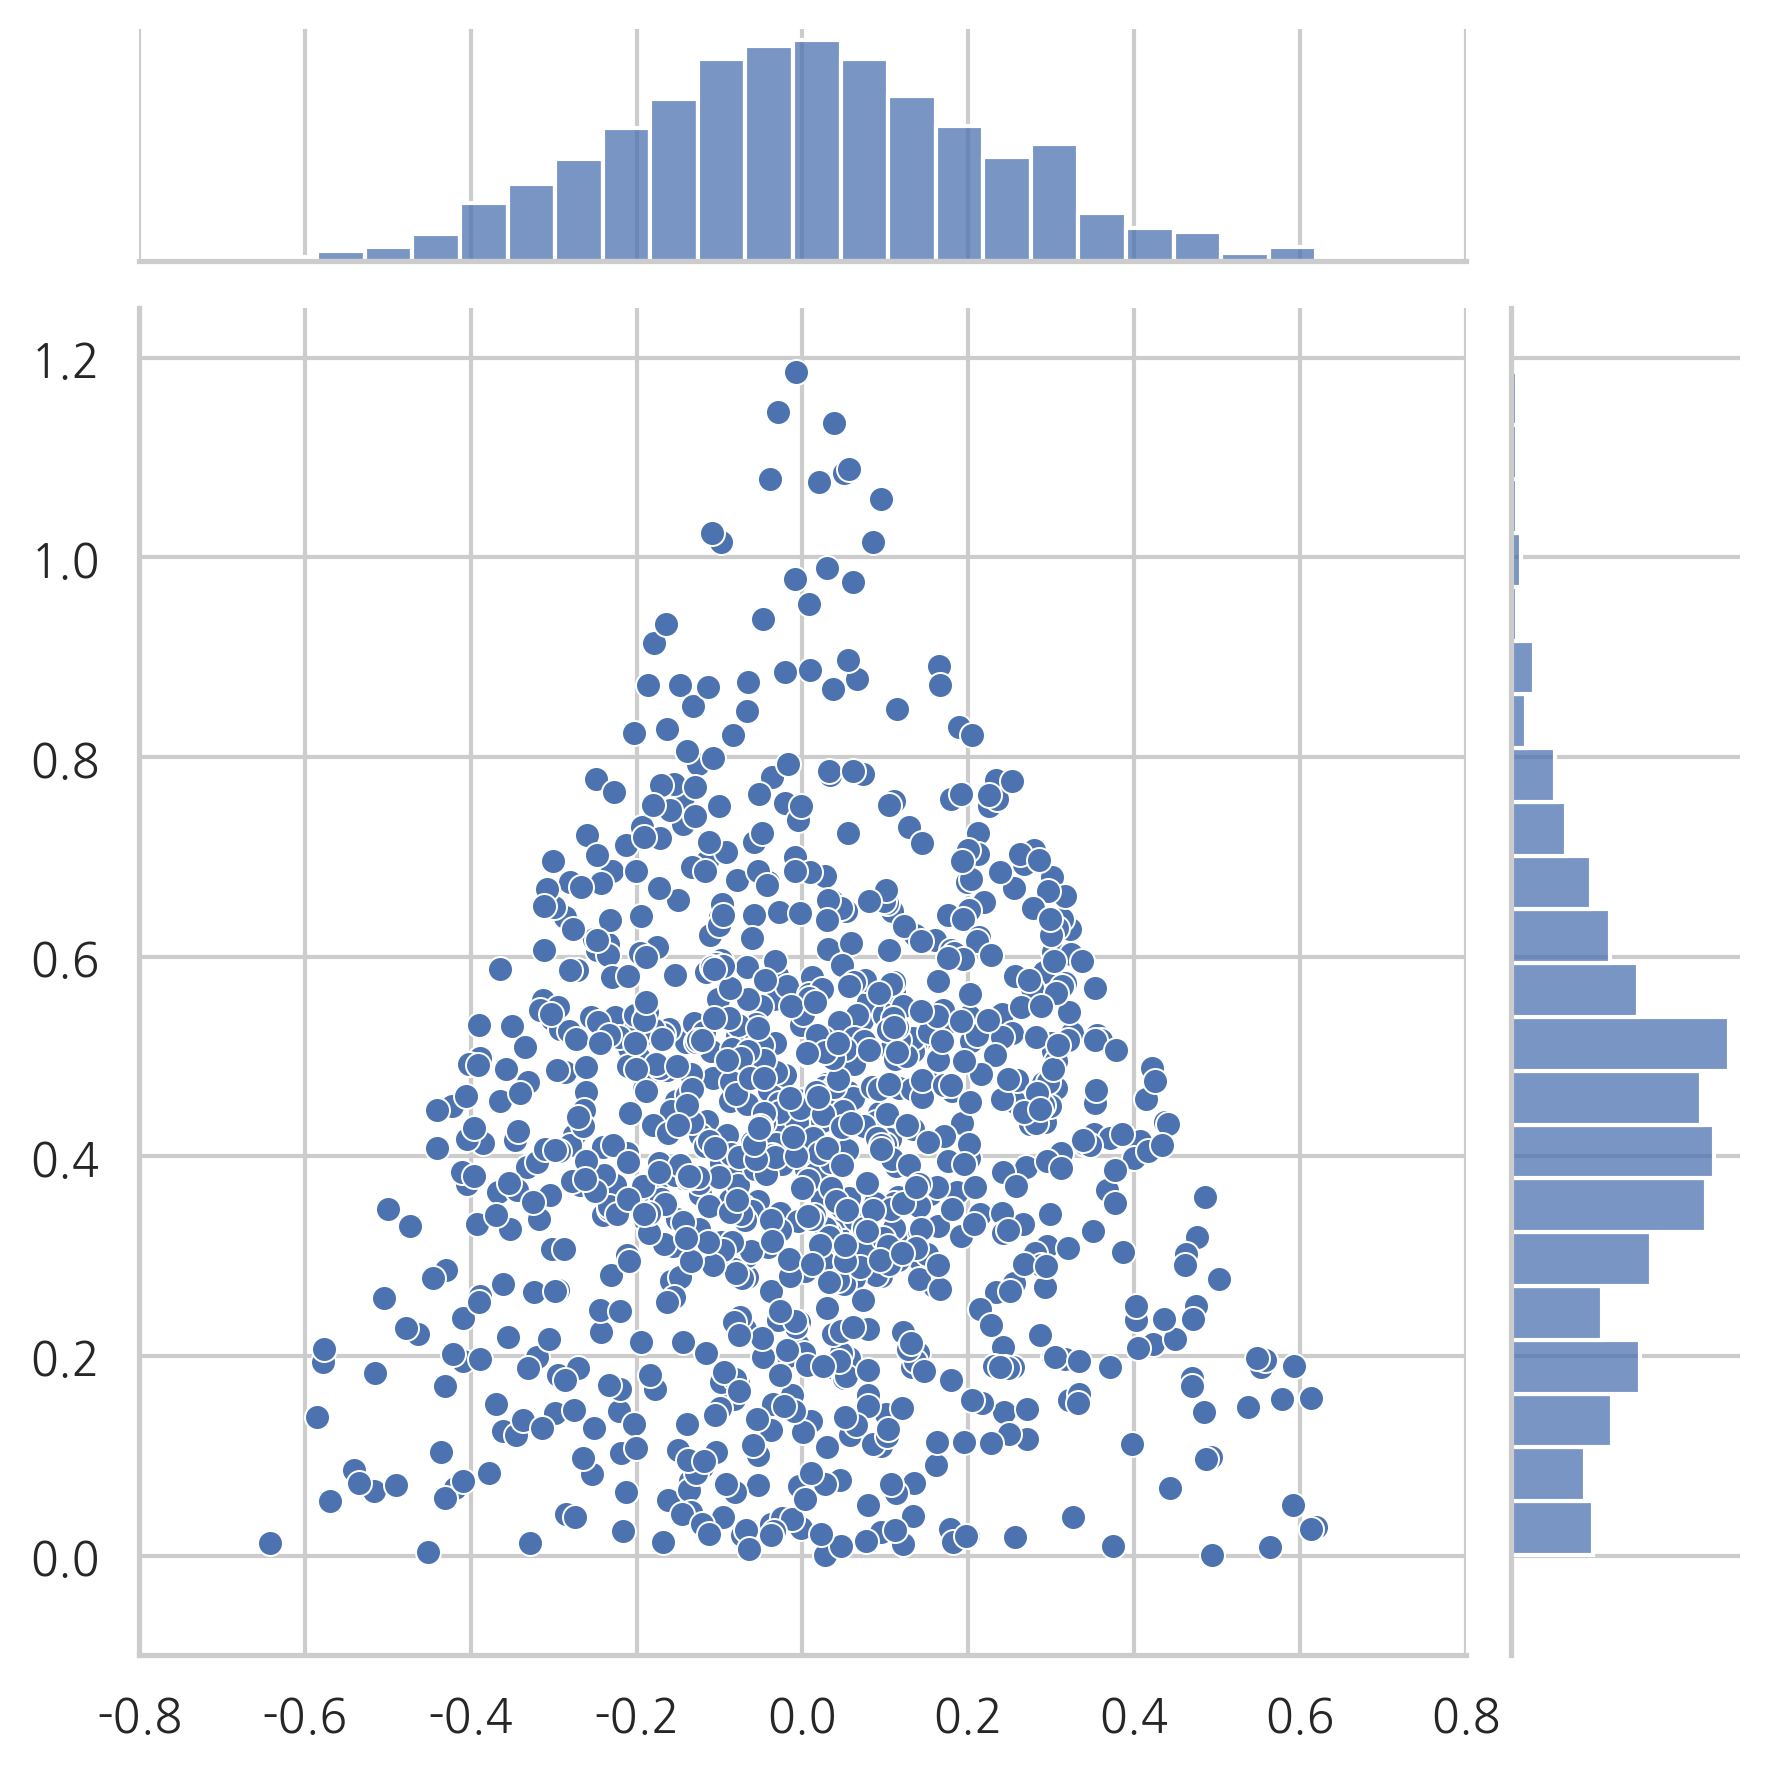

In [70]:
def plot_triangle(X, kind) : 
    n1 = np.array([1,0,0])
    n2 = np.array([0,1,0])
    n3 = np.array([0,0,1])
    n12 = (n1+n2)/2
    m1 = np.array([1,-1,0])
    m2 = n3-n12
    m1 = m1/np.linalg.norm(m1)
    m2 = m2/np.linalg.norm(m2)

    x1 = (X-n12).dot(m1)
    x2 = (X-n12).dot(m2)

    sns.jointplot(x1, x2, kind=kind, xlim=(-0.8, 0.8), ylim=(-0.1, 1.25))
    plt.show()

# 균등분포 3개에서 합 1되는 표본 추출, 이 벡터들의 분포 
np.random.seed(0)
x1 = np.random.rand(1000, 3)
x1 = x1/x1.sum(axis=1)[:, np.newaxis] # 합이 1 되도록 정규화 
plot_triangle(x1, kind='scatter')


# 균등분포에서 얻은 3차원 벡터들의 분포는 균등하지 못했다

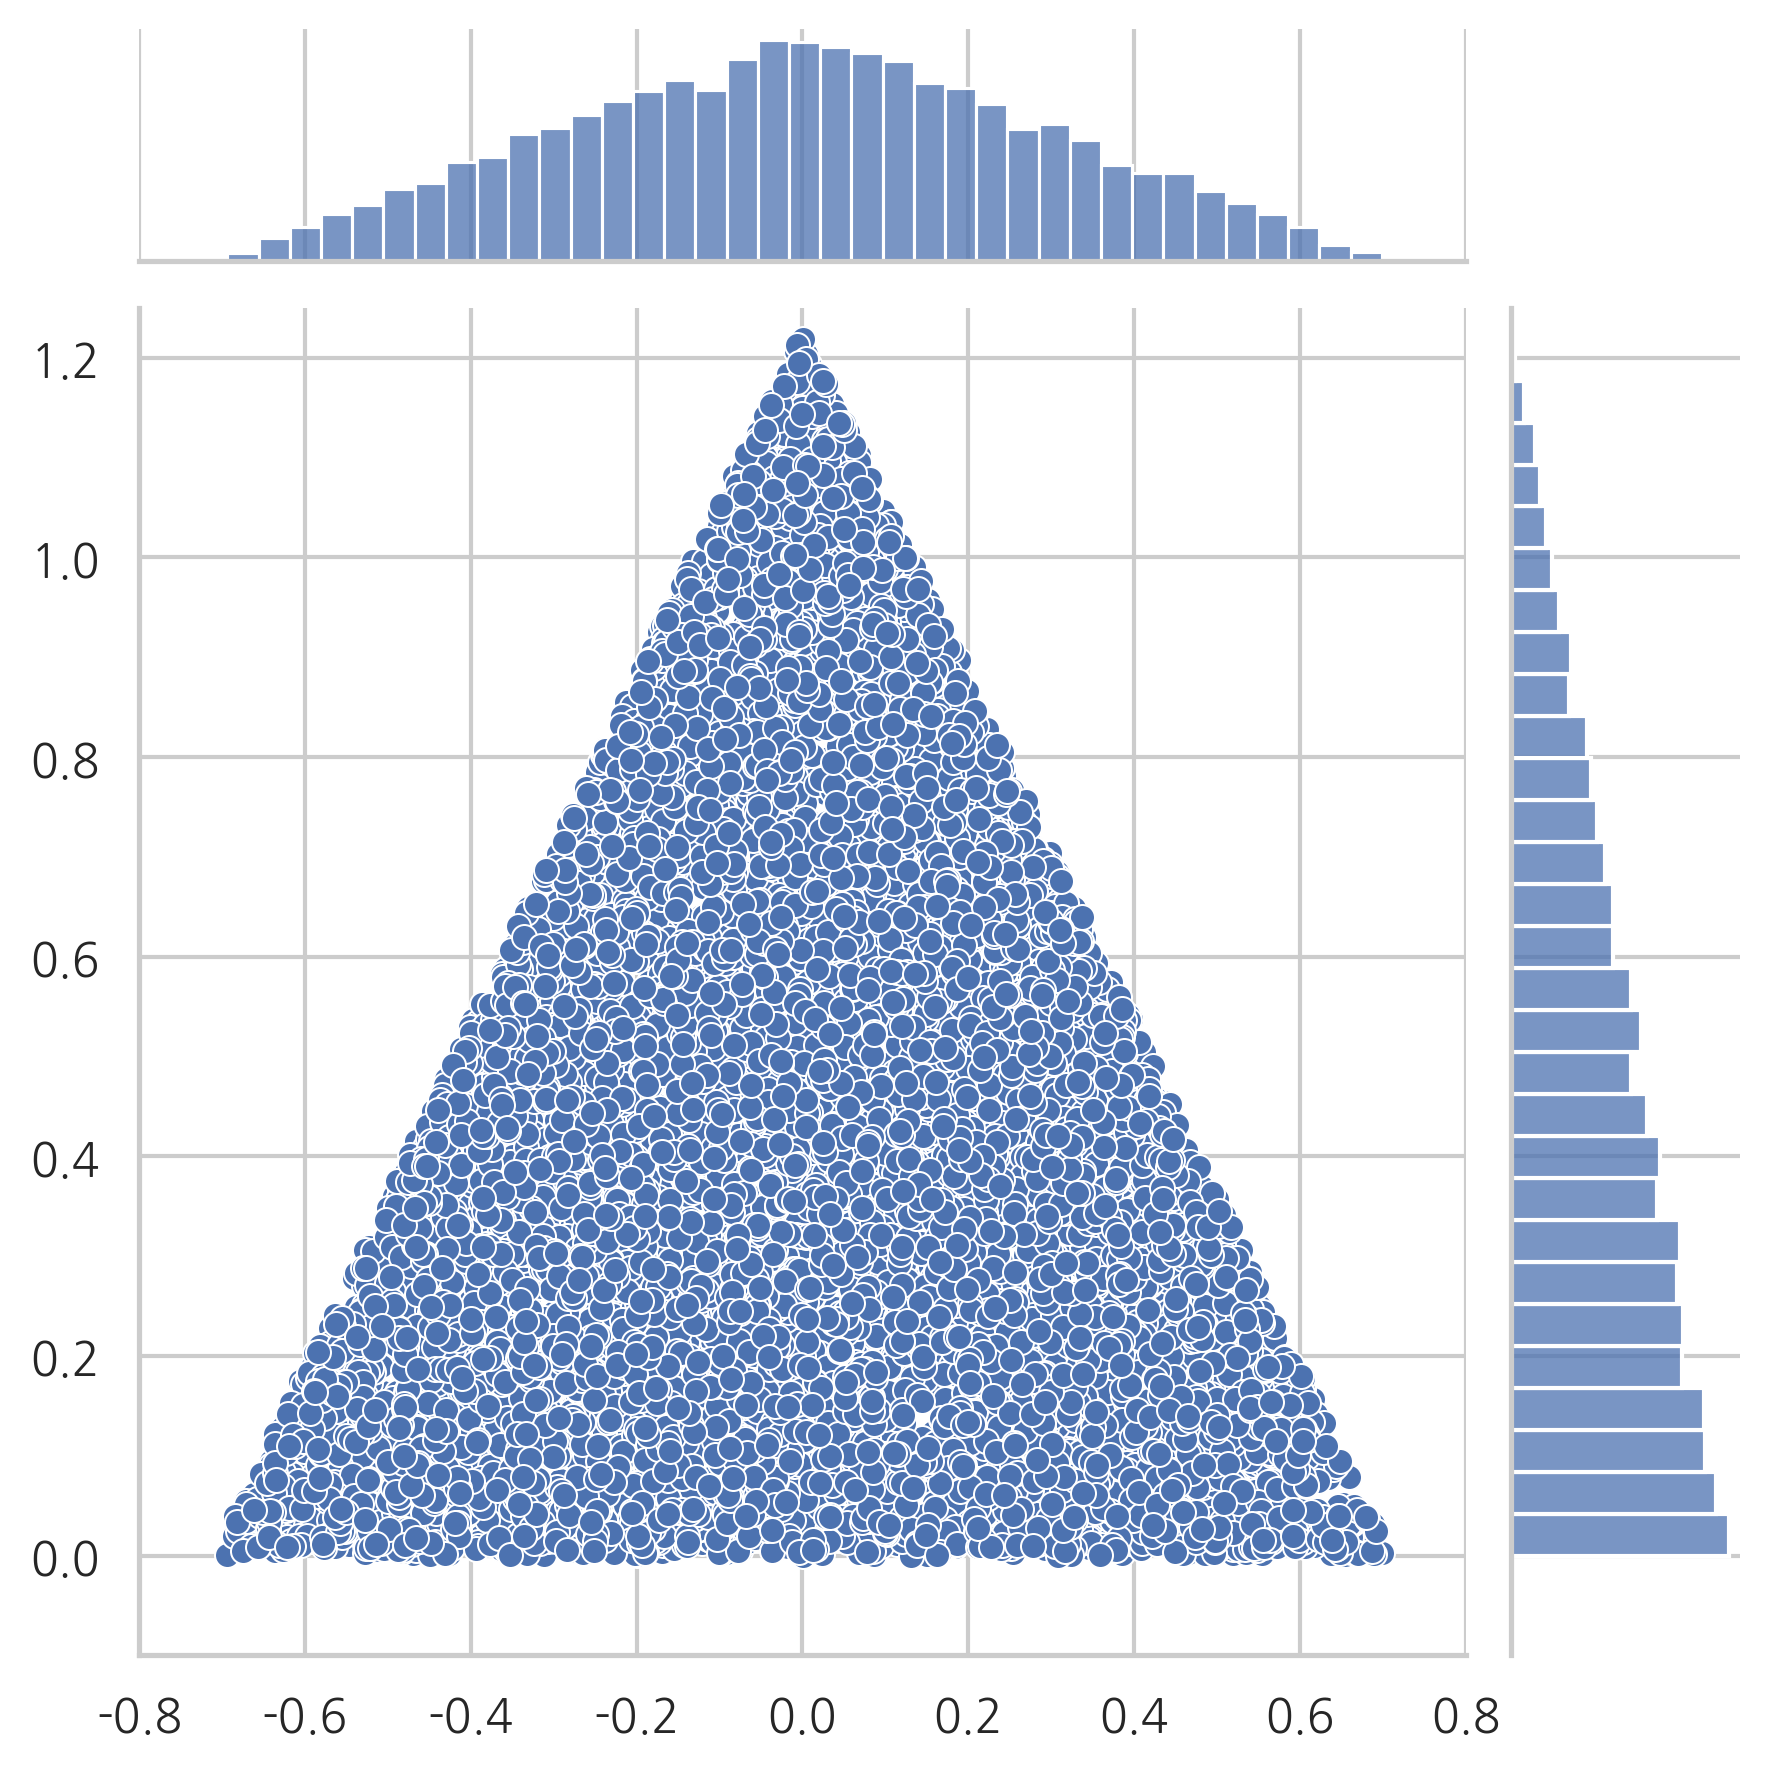

In [94]:
# a1 = a2 = a3 인 디리클레분포는? 
# 다변수 균등분포가 나올 것인가? 
x2 = sp.stats.dirichlet([1]*3) # 모수벡터 원소가 모두 같은 디리클레분포 객체 
rs = x2.rvs(10000) # k는 모수벡터 차원 따라 알아서 지정된다. 

plot_triangle(rs, kind='scatter')

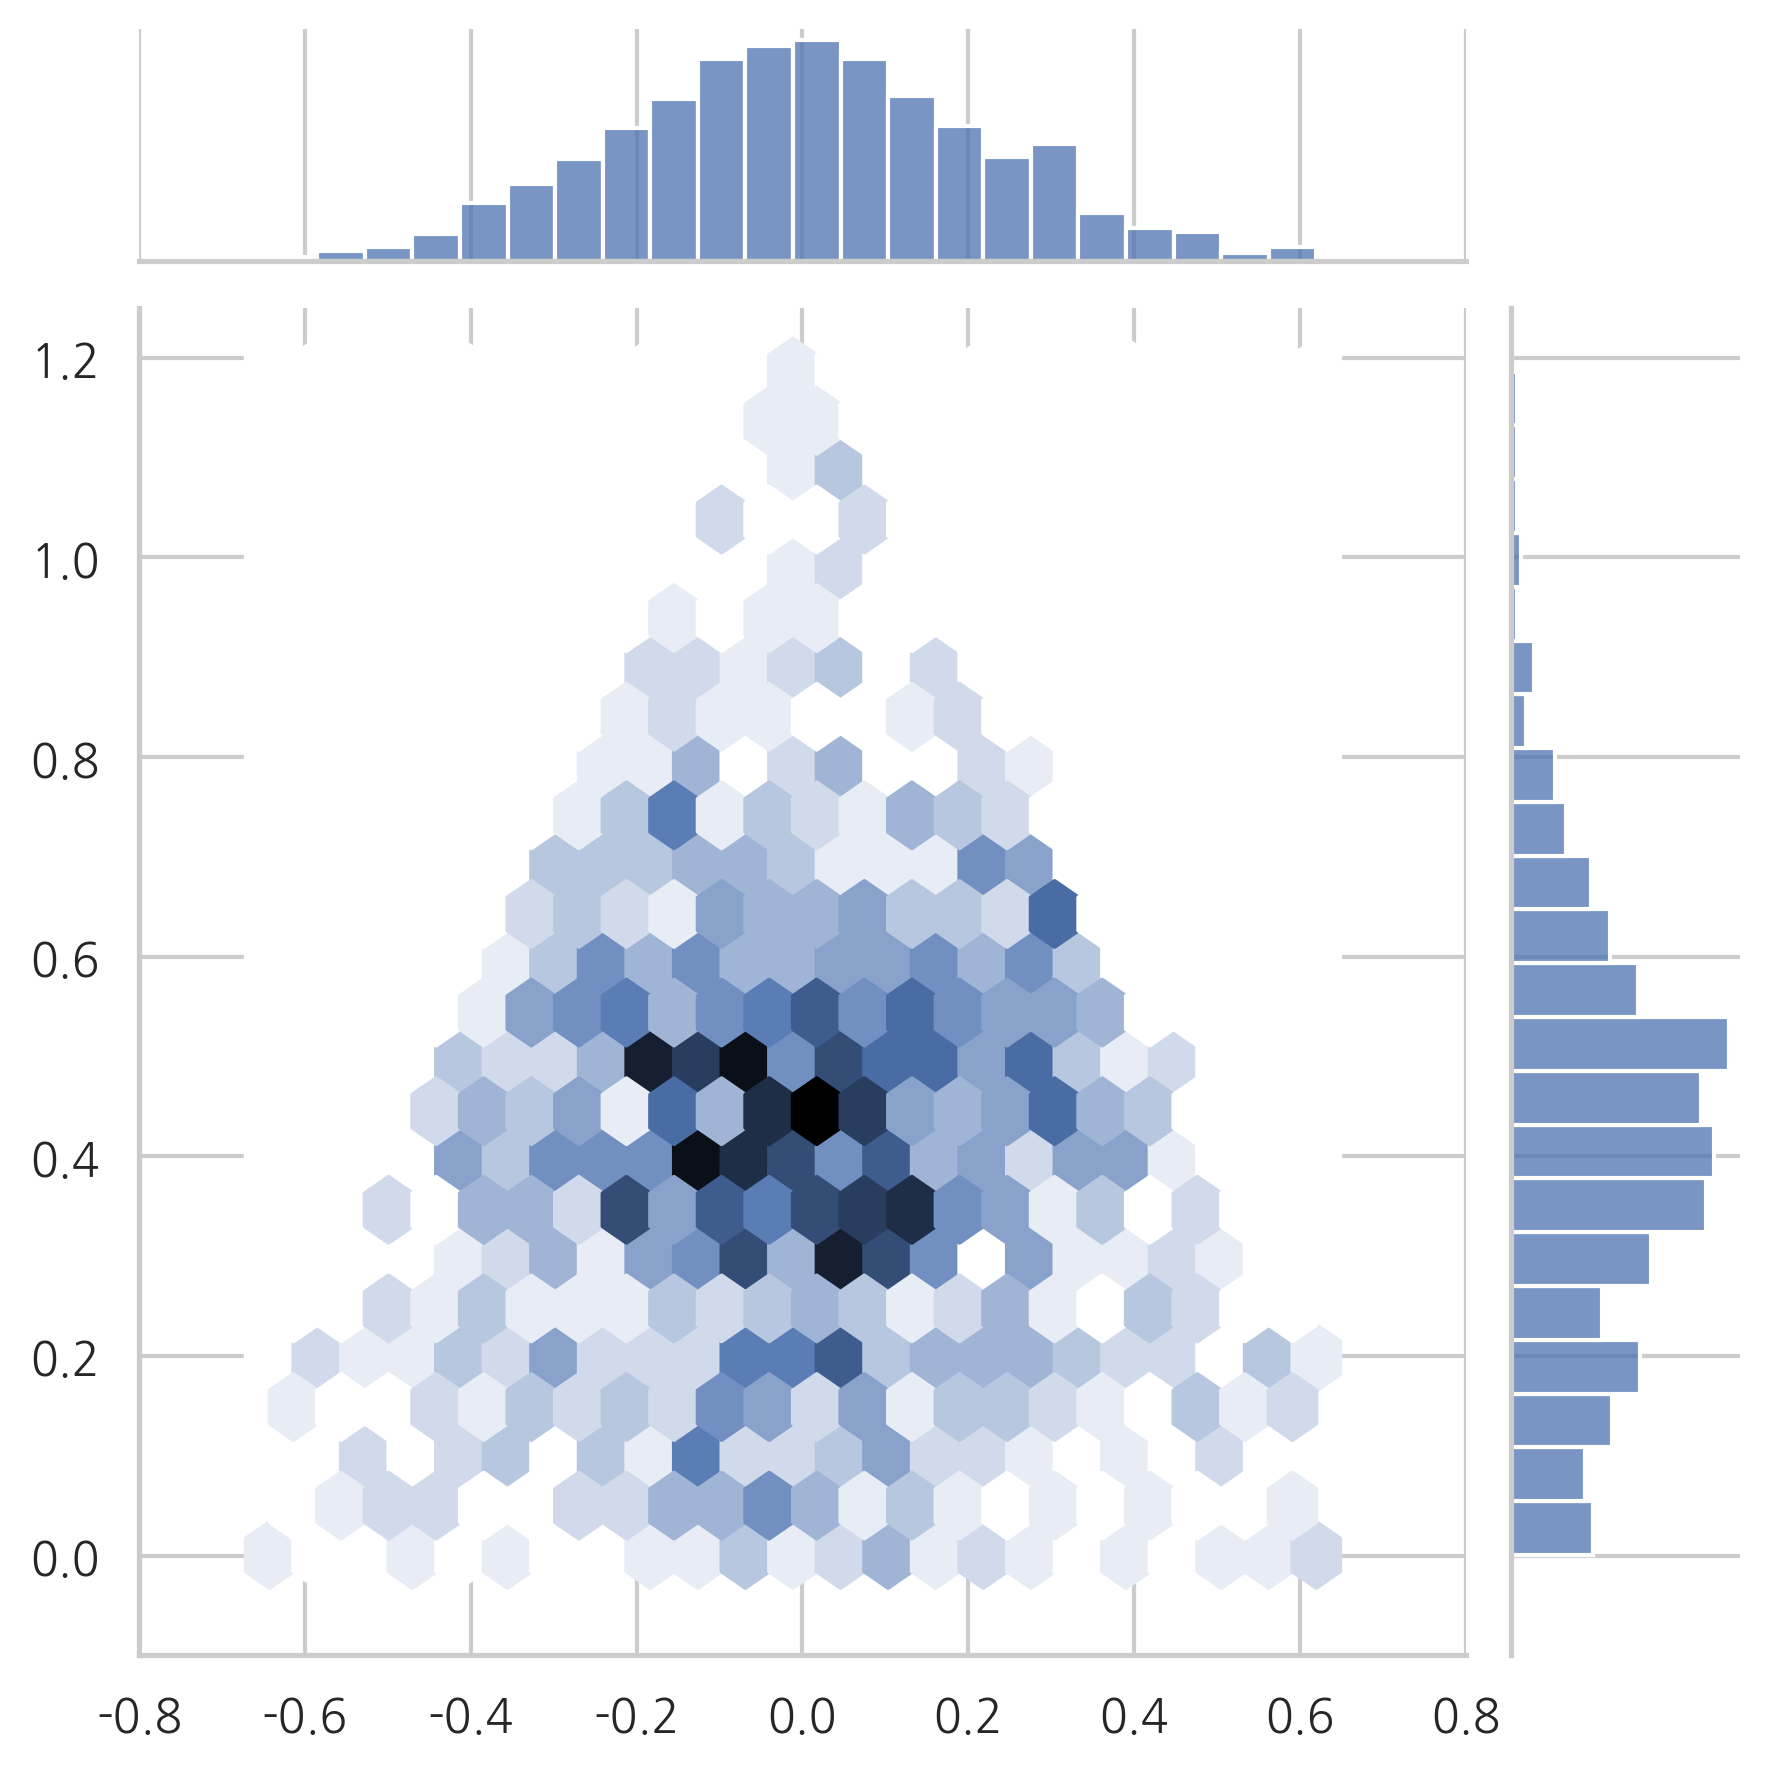

In [88]:
plot_triangle(x1, kind='hex')

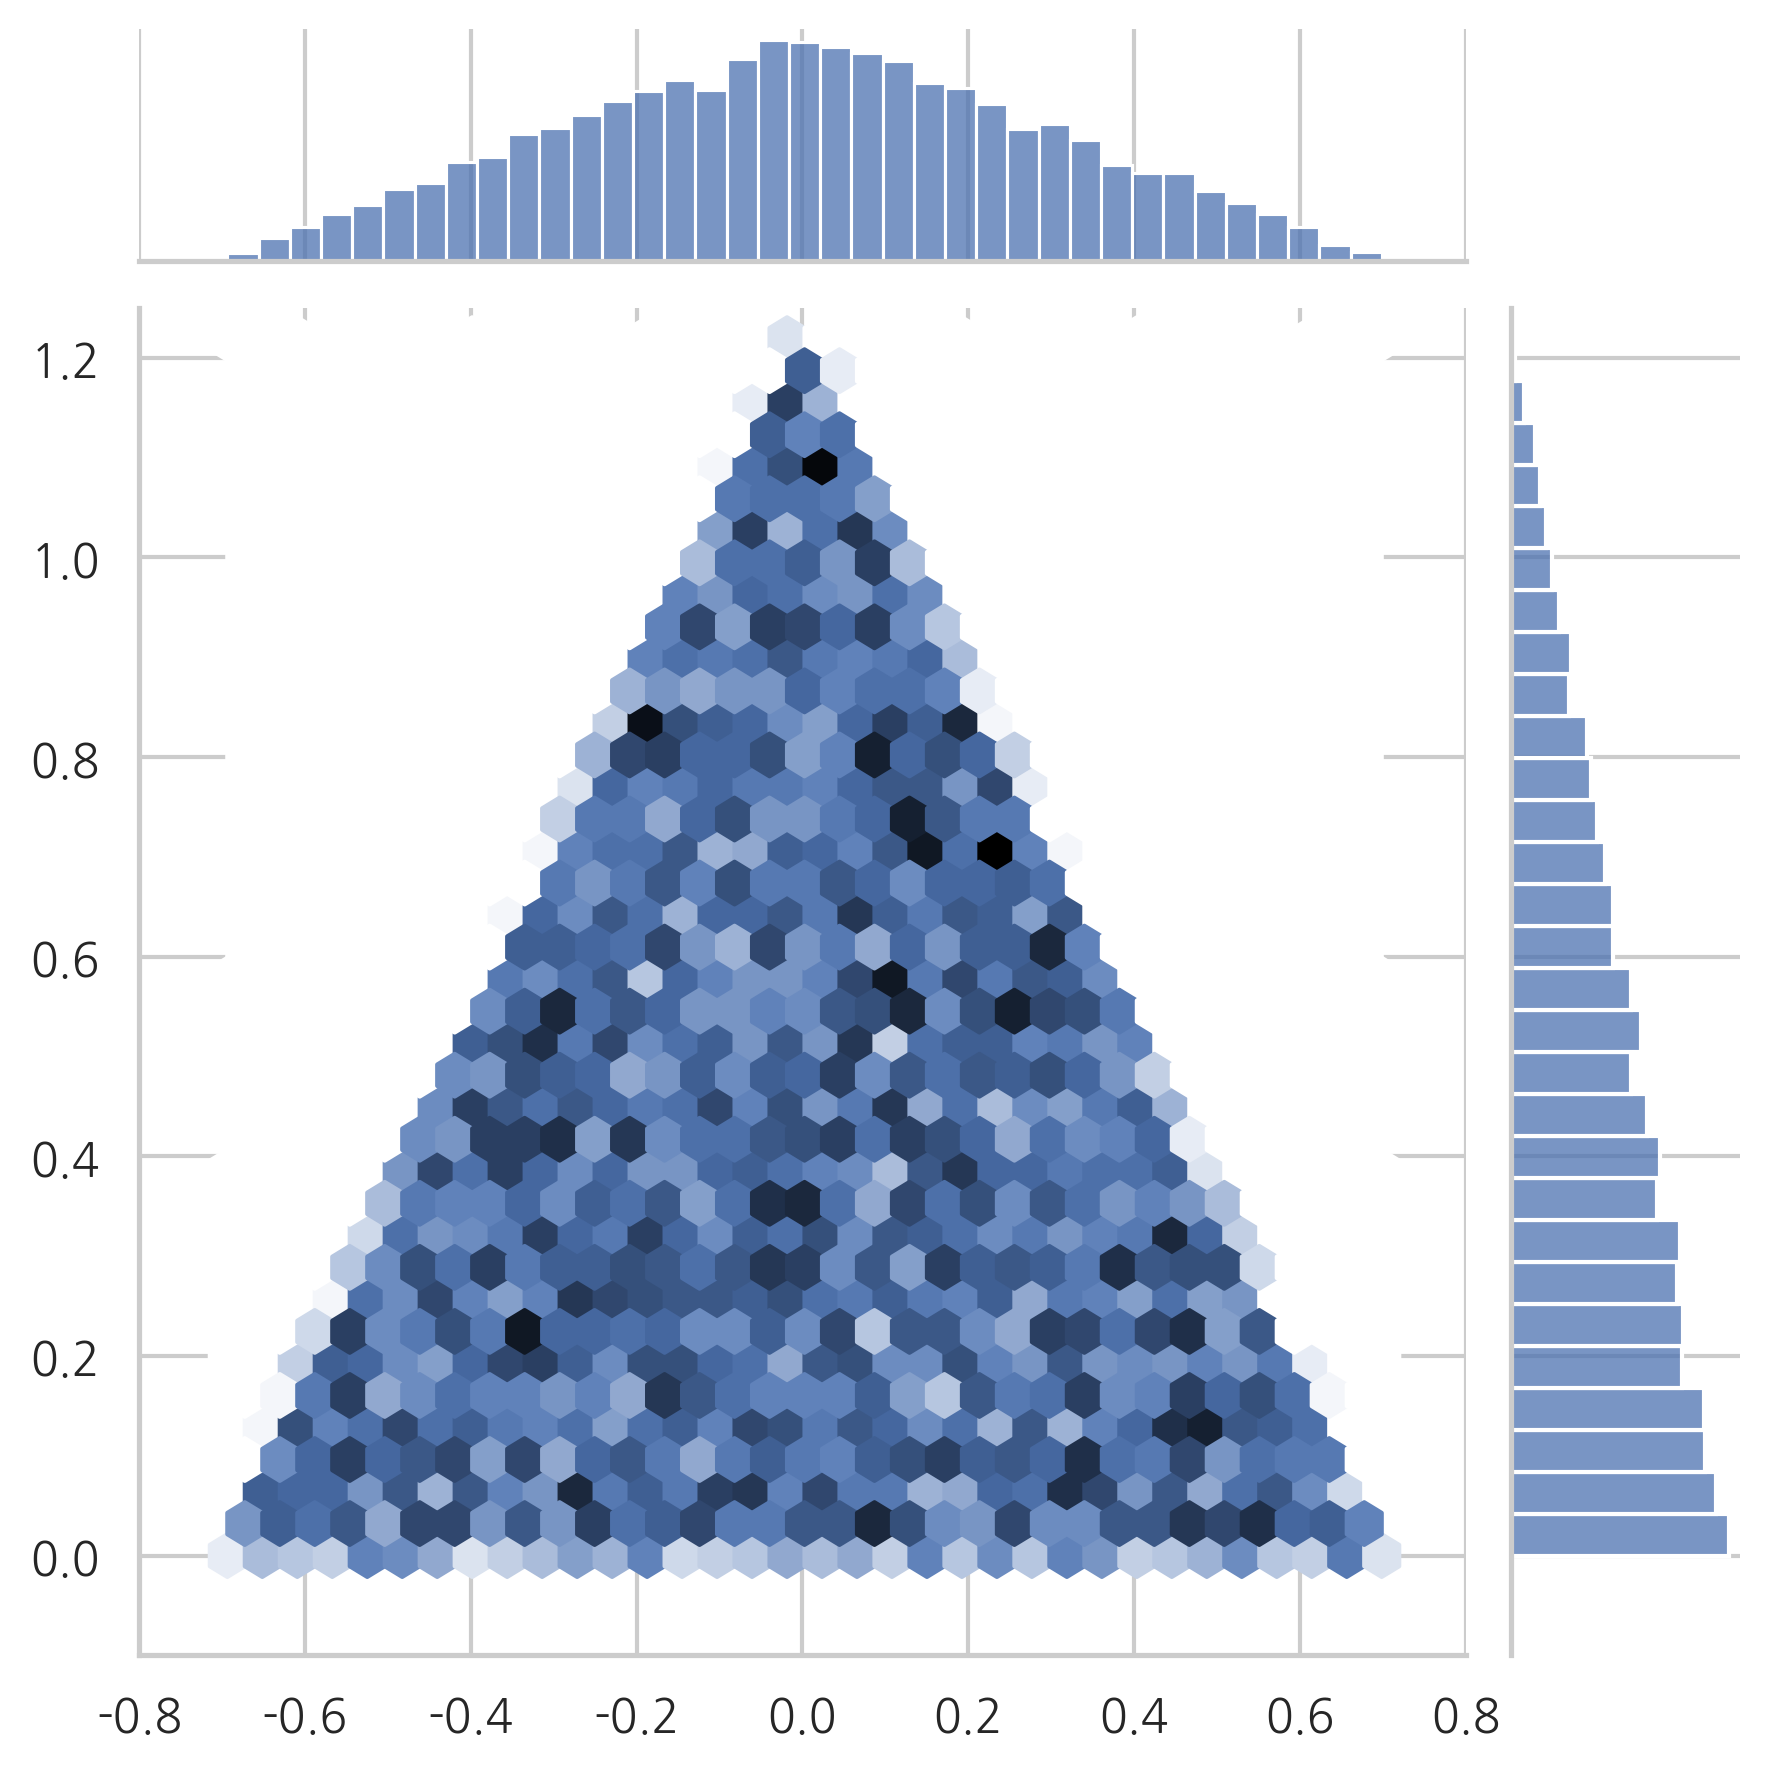

In [95]:
plot_triangle(rs, kind='hex')

In [114]:
def project(x) : 
    n1 = np.array([1,0,0])
    n2 = np.array([0,1,0])
    n3 = np.array([0,0,1])
    n12 = (n1+n2)/2
    m1 = np.array([1,-1,0])
    m2 = n3-n12
    m1 = m1/np.linalg.norm(m1)
    m2 = m2/np.linalg.norm(m2)
    return np.dstack([(x-n12).dot(m1), (x-n12).dot(m2)])[0]

def project_reverse(x) : 
    n1 = np.array([1,0,0])
    n2 = np.array([0,1,0])
    n3 = np.array([0,0,1])
    n12 = (n1+n2)/2
    m1 = np.array([1,-1,0])
    m2 = n3-n12
    m1 = m1/np.linalg.norm(m1)
    m2 = m2/np.linalg.norm(m2)
    return x[:,0][:, np.newaxis]*m1+x[:,1][:,np.newaxis] * m2 + n12
eps = np.finfo(float).eps*10
x = project([[1-eps, 0,0], [0, 1-eps, 0],[0,0,1-eps]])

import matplotlib.tri as mtri
triang = mtri.Triangulation(x[:,0], x[:,1], [[0,1,2]])
refiner = mtri.UniformTriRefiner(triang)
triang2 = refiner.refine_triangulation(subdiv=6)
XYZ = project_reverse(np.dstack([triang2.x, triang2.y, 1-triang2.x-triang2.y])[0])


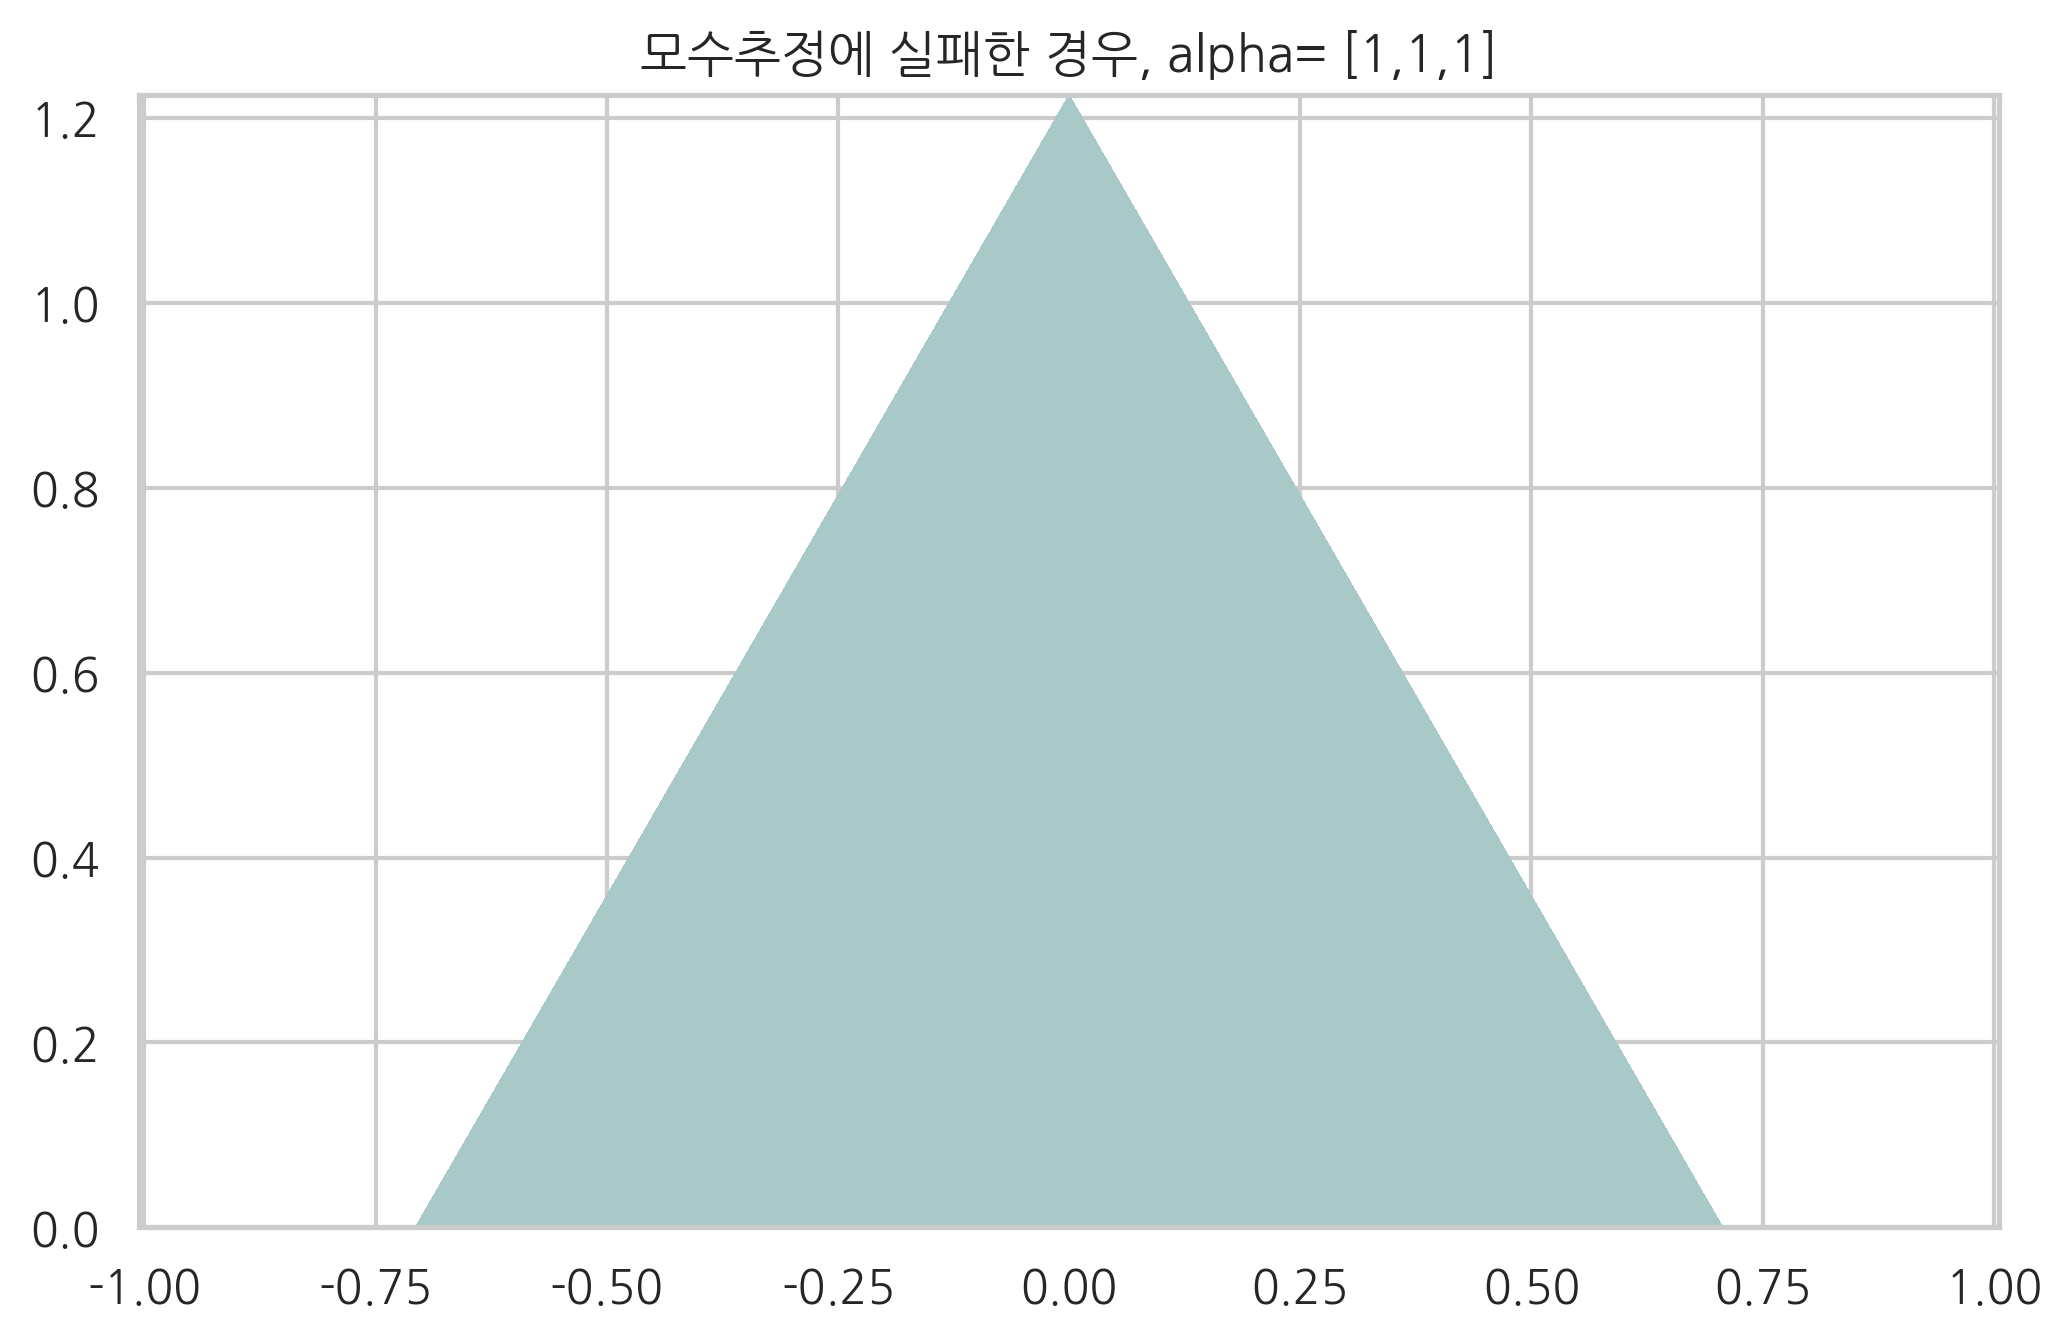

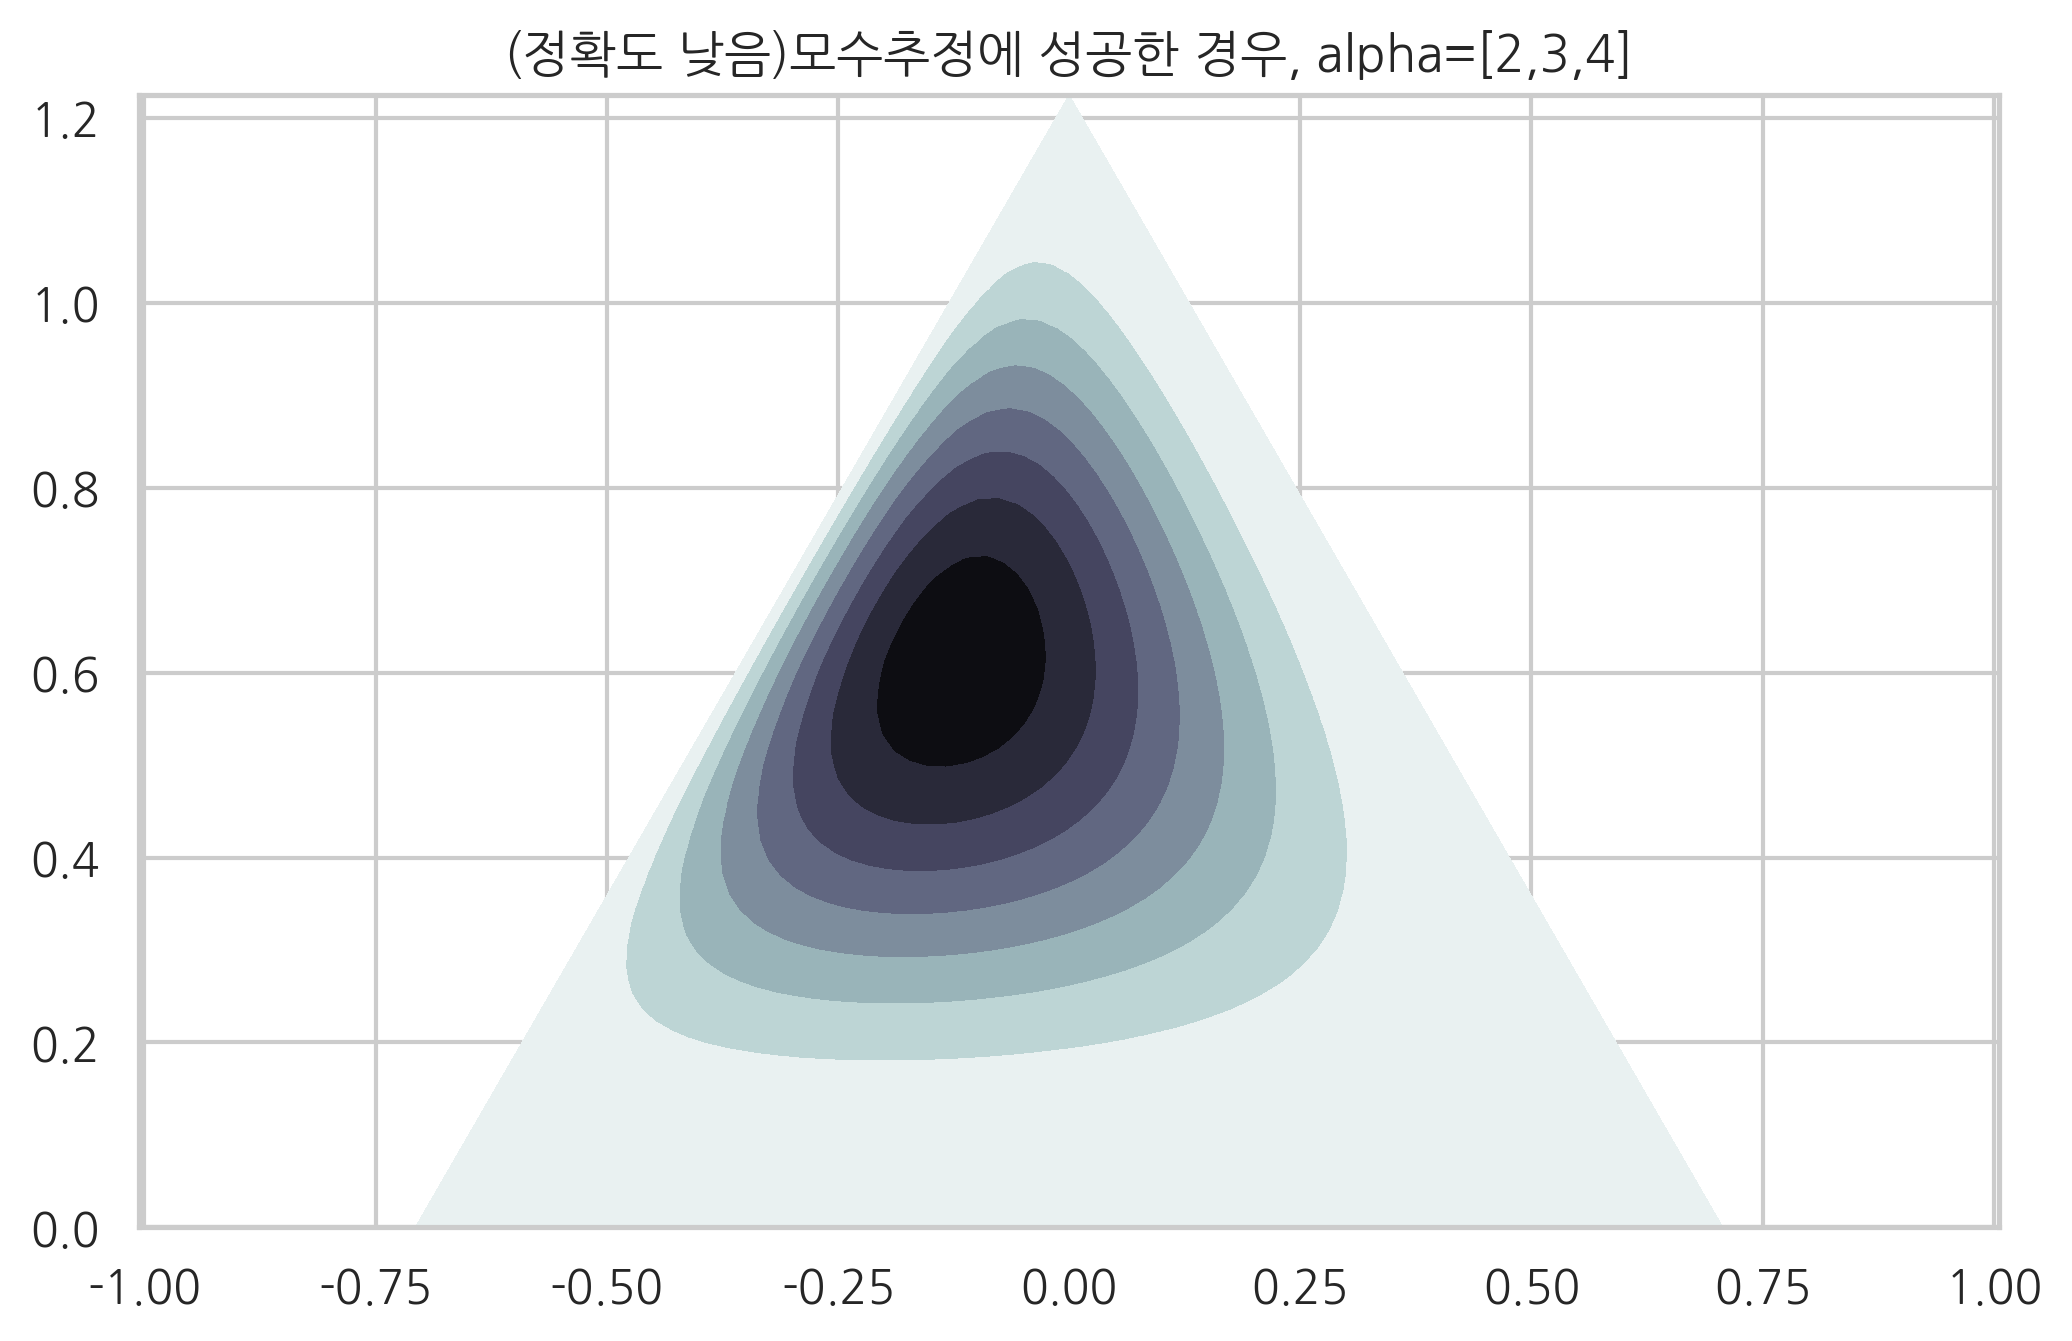

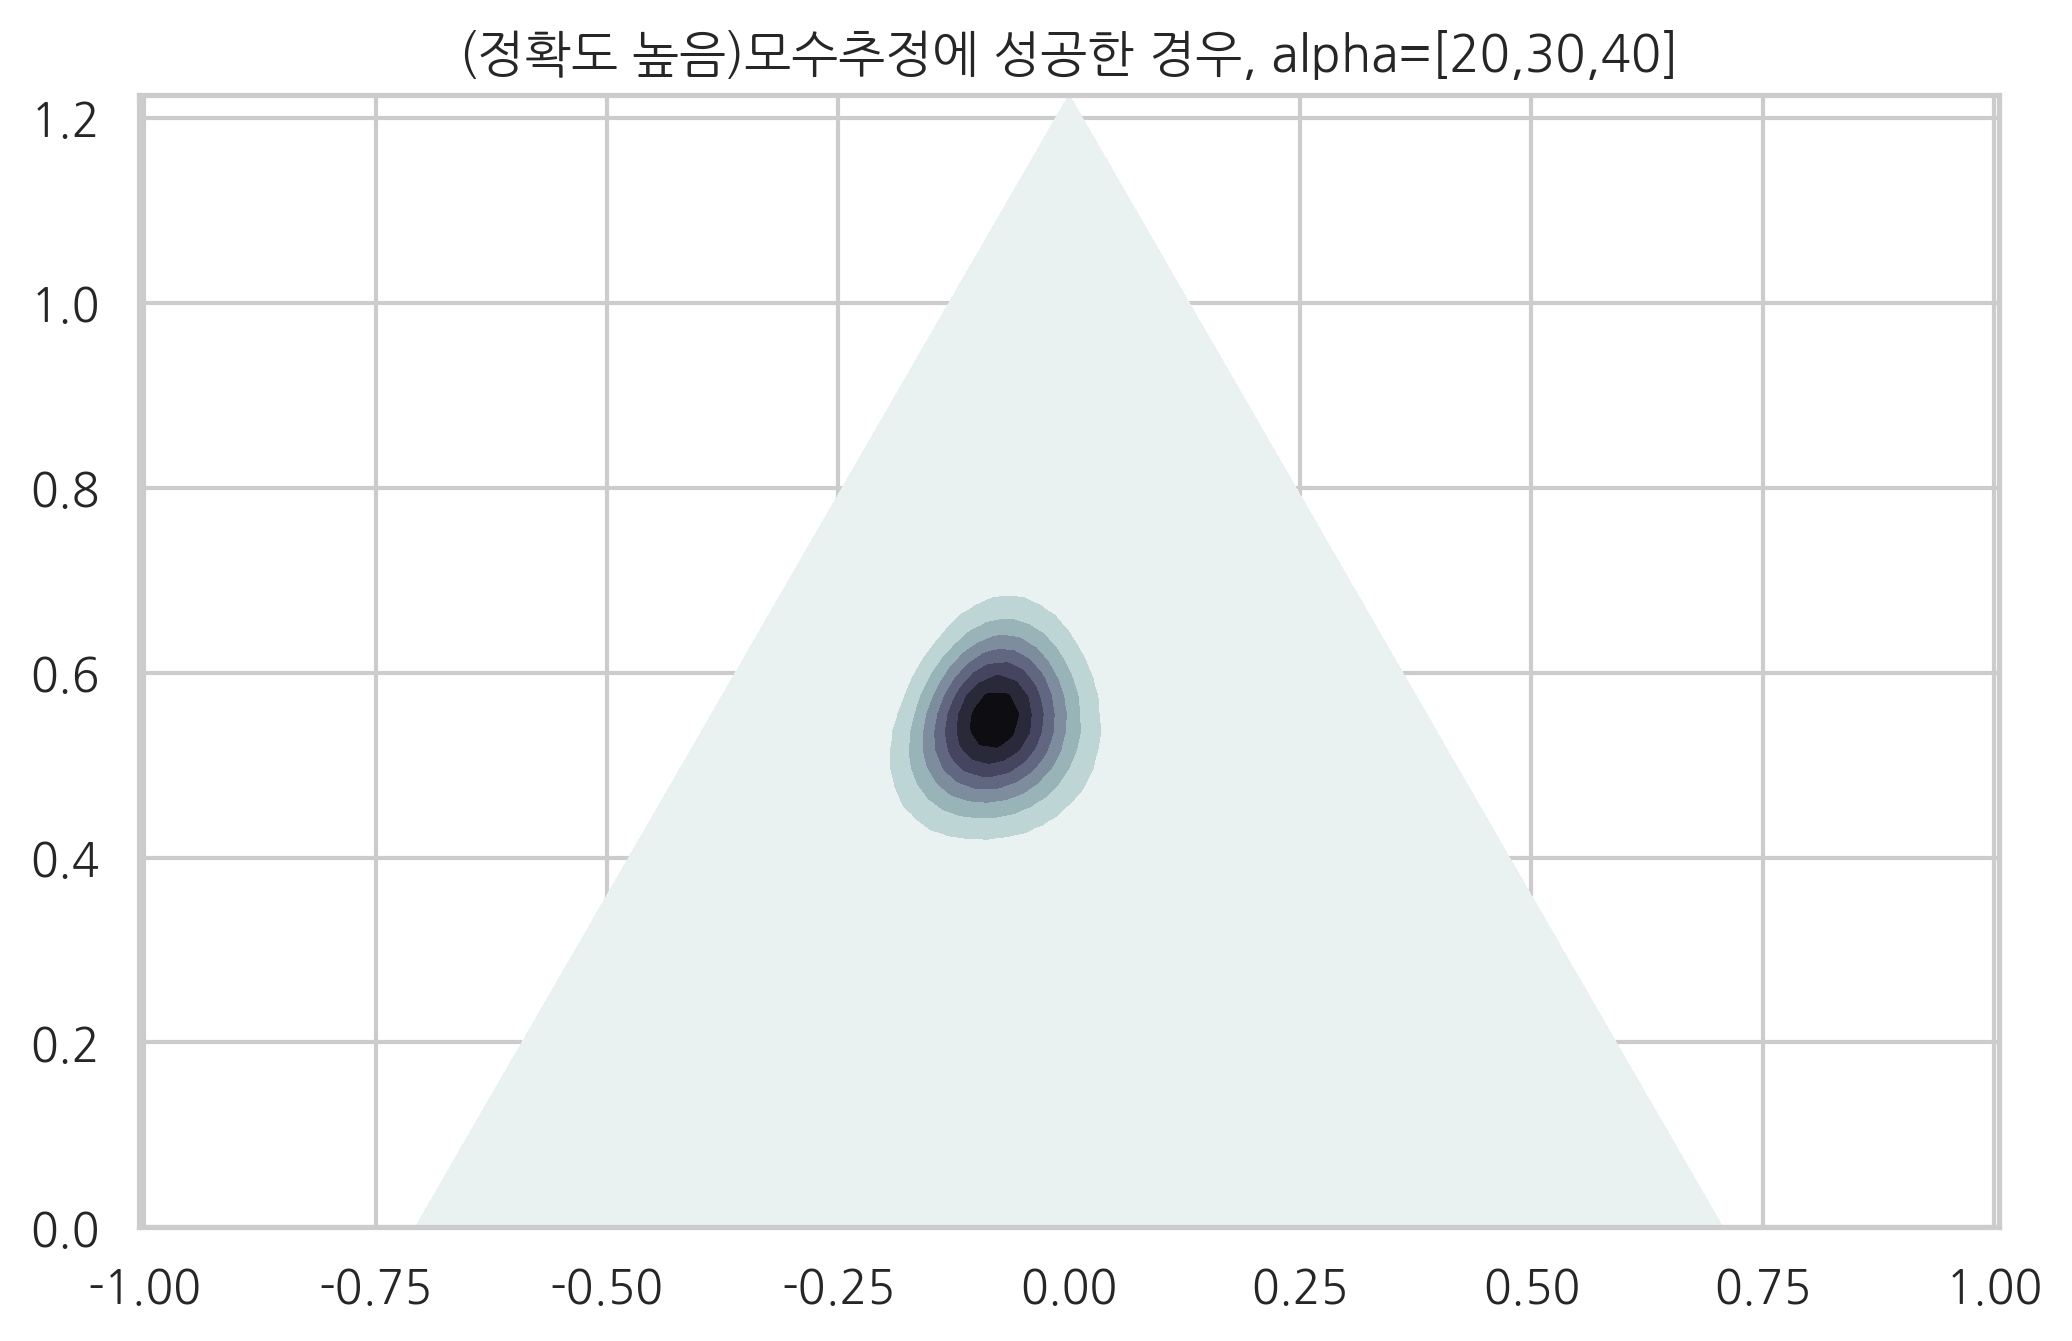

In [158]:
# 디리클레분포를 이용한 베이지안 추정
pdf = sp.stats.dirichlet((1,1,1)).pdf(XYZ.T) # 디리클레분포 확률밀도함수
plt.tricontourf(triang2, pdf, cmap=plt.cm.bone)
plt.axis('equal')
plt.title('모수추정에 실패한 경우, alpha= [1,1,1]')
plt.show()


pdf = sp.stats.dirichlet([2,3,4]).pdf(XYZ.T)
plt.tricontourf(triang2, pdf, cmap=plt.cm.bone_r)
plt.axis('equal')
plt.title('(정확도 낮음)모수추정에 성공한 경우, alpha=[2,3,4]')
plt.show()


pdf = sp.stats.dirichlet([20,30,40]).pdf(XYZ.T)
plt.tricontourf(triang2, pdf, cmap=plt.cm.bone_r)
plt.axis('equal')
plt.title("(정확도 높음)모수추정에 성공한 경우, alpha=[20,30,40]")

plt.show()

